In [ ]:
- title: Занятие 7
- author: Kononov Dmitry
- date: 2022-11-20
- category: python
- test_link: http://olymp3.vdi.mipt.ru/cgi-bin/new-client?contest_id=10104
- test_comment: Задание №4
- tags: lab 7
- slug: lab7
- ipynb_url: download/lab7.ipynb

# Практическое занятие 7: Рекурсия, быстрые сортировки — Хоара и слиянием 
## Цель: Получить практический навык реализации рекурсии и алгоритмов быстрой сортировки на языке **Python**
## Задачи:
1. Рекурсия
2. Быстрая сортировка слиянием
3. Быстрая сортировка Хоара

## Рекурсия
Как мы видели на предыдущих занятиях, функции могут вызывать другие функции — например, в рассмотренных ранее примерах происходил вызов функции `range()` из других функций. При этом функция может вызывать саму себя. Такой тип вызова называется *рекурсивным*. Самый простой пример рекурсивного вызова функции — вычисление факториала числа:
``` python
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)
```

Воспользуемся ресурсом [pythontutor.com](https://pythontutor.com/) для визуализации рекурсивного вызова функции `factorial(4)`. Из рисунка ниже видно, что до возврата первого значения происходит 5 рекурсивных вызовов функции `factorial()`. И только в пятом вызове, когда условие `n == 0` становится равным *True* происходит последоватеьный возврат заначений: 1, 1, 2, 6, 24:
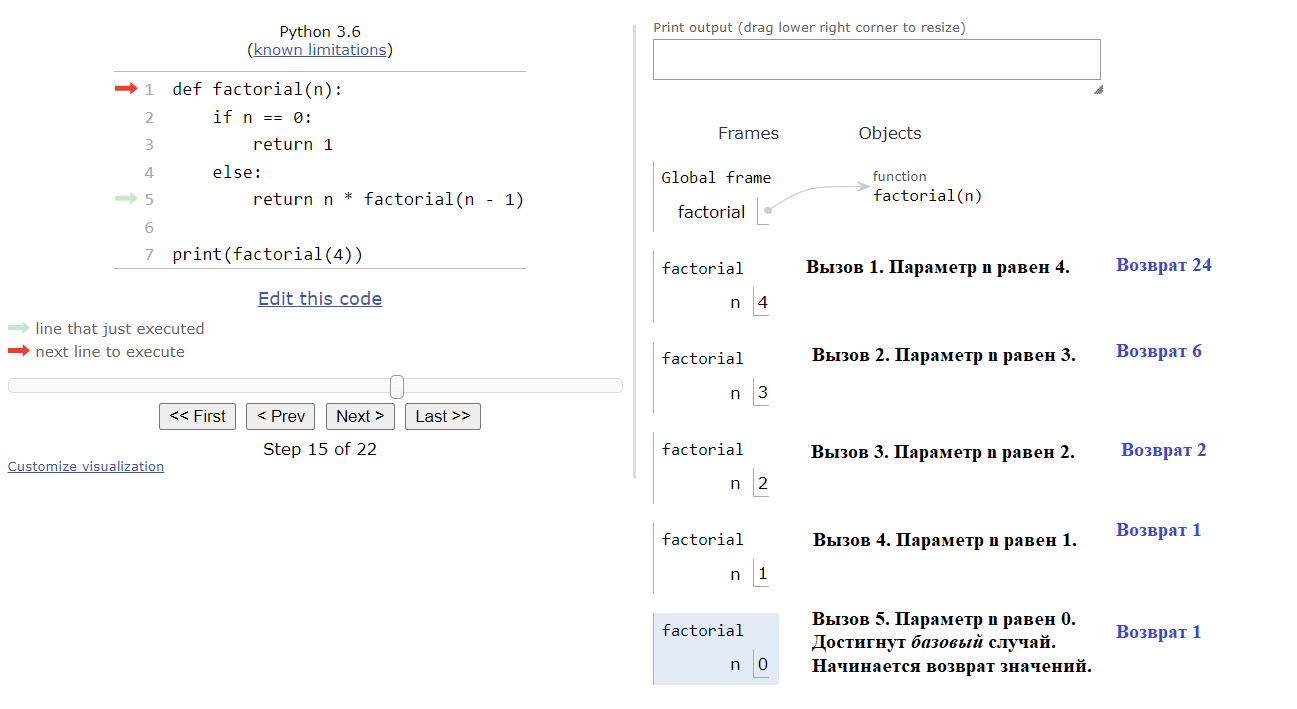

Случай, когда условие `n == 0` принимает значение *True* называется **базовым**. Случаи, когда условие `n == 0` принимает значение *False* — **рекурсивными**. При разработке рекурсивного алгоритма важно выделить **базовый** случай. Если этого не сделать, то рекурсия будет продолжаться "бесконечно" — до тех пор, пока не закончится память, выделяемая для каждого вызова (см. рисунок выше).

### Глубина рекурсии в **Python**
По умолчанию глубина рекурсии в языке Питон ограничена 1000 вызовов. Это ограничение можно поднять при помощи функции  `setrecursionlimit()` из модуля `system`. Например, чтобы увеличить возможную глубину рекурсии до 10000 нужно в начале программы выполнить две инструкции:
``` python
import sys
sys.setrecursionlimit(10000)
```

**Задача 1: Напишите программу, вычисляющую n-ное [число Фибоначчи](https://ru.wikipedia.org/wiki/Числа_Фибоначчи). Используйте рекурсивные вызовы функций.**

Пример:

Ввод: 7

Вывод: 13

### Рекурсия и циклы
В большинстве случаев рекурсивный алгоритм можно переписать с использованием цикла. Например, функция вычисления факториала примет следующий вид:
``` python
def factorial_while(n):
    f = 1
    x = 2
    while x <= n:
        f *= x
        x += 1
    
    return f
```

Реализация алгоритма вычисления факториала с использованием рекурсии представляется более понятной и лаконичной, чем с использованием цикла. Кроме тог, существует ряд задач, для которых построение нерекурсивного алгоритма представляется весьма трудозатратным.

## Быстрая сортировка слиянием
Алгоритм сортировки слиянием основан на идее, что два отсортированных списка можно слить в один отсортированный список за время, равное суммарной длине этих списков.

Для этого сравним первые элементы данных списков. Тот элемент, который меньше, скопируем в конец результирующего списка (который первоначально пуст) и в этом списке перейдем к следующему элементу. Будем повторять этот процесс (выбираем из начала двух списков наименьший элемент, копируем его в результирующий список), пока один из исходных списков не кончится. После этого оставшиеся элементы (один из двух исходных списков будет непуст) скопируем в результирующий список.

Для того, чтобы не удалять начальные элементы из списков, заведем два индекса *i* и *j*, указывающие на текущие элементы в каждом списке. В процессе слияния будем передвигать эти индексы. В конце добавим к результирующему списку оставшиеся элементы из двух исходных списков A[i:] + B[j:]:
```python
def merge(A, B):
    C = [] # Массив, для хранения результата слияния
    i = 0
    j = 0
    while i < len(A) and j < len(B):
        if A[i] <= B[j]:
            C.append(A[i]) 
            i += 1 
        else:
            C.append(B[j]) 
            j += 1 
    C += A[i:] + B[j:] # Суммируем оба среза, чтобы не добавлять дополнительную проверку — пустой срез не повлияет на результат 
    return C
```

Асимптотическая сложность алгоритма слияния двух массивов, реализованного в функции `merge()` — линейная от суммарных длин списков `A` и `B`, так как каждый элемент обрабатывается ровно один раз за — $O(len(A) + len(B))$.

Быструю сортировку слиянием реализуем в виде **рекурсивной** функции, которая получает на вход исходный список `A`. Если длина исходного списка равна 1 или 0, то он уже отсортирован и сортировать его не надо. Если же длина списка больше 1, то он разбивается на две части равной длины (или почти равной, если длина исходного списка — нечетная), которые сливаются при помощи функции `merge()`:
```python
def merge_sort(A): 
    if len(A) <= 1: 
        return A 
    else:
        LA = A[:len(A) // 2] # выделим левую половину исходного массива 
        RA = A[len(A) // 2:] # выделим правую половину исходного массива 
    return merge(merge_sort(LA), merge_sort(RA))
```

### Асимптотическая сложность сортировки слиянием
Асимптотическая сложность алгоритма сортировки слиянием равна $O(n*log_2(n))$, где n — размер массива. 

**Задача 2: распишите на листке бумаги последовательность рекурсивных вызовов функции `merge_sort()` для массива `A = [1, 8, 7, 4, 2, 3, 1, 5]` и убедитесь, что массив сортируется** 

## Быстрая сортировка Хоара
Этот алгоритм, также называемый просто «быстрая сортировка» (англ. quicksort) придуман английским ученым Чарльзом Хоаром в 1960 году.

Идея быстрой сортировки похожа на идею, используемую в алгоритме сортировки слиянием. 

Выбирается некоторый элемент *pivot*, называемый барьерным элементом. Массив разбивается на три части: в первой части собираются элементы, меньшие *pivot*, во второй части — большие *pivot*, а в третьей — равные *pivot*. После этого достаточно отсортировать две части (часть с равными *pivot* частями сортировать необходимости нет) и выполнить конкатенацию полученных частей.

Реализация быстрой сортировки Хоара выглядит так:
``` python
import random
def quick_sort(A):
    if len(A) <= 1:
        return A
    else:
        pivot = random.choice(A)
        less = [x for x in A if x < pivot]
        equal = [pivot] * A.count(pivot)
        greater = [x for x in A if x > pivot] 
        return quick_sort(less) + equal + quick_sort(greater)
```
Барьерный элемент *pivot* выбирается случайным образом из списка при помощи функции `choice()` из модуля **random** для повышения эффективности алгоритма.
Как и в случае сортировки слиянием, данный алгоритм требует выделение дополнительной памяти для сортированного массива.

**Задача 3: распишите на листке бумаги последовательность рекурсивных вызовов функции `quick_sort()` для массива `A = [1, 8, 7, 4, 2, 3, 1, 5]` и убедитесь, что массив сортируется** 

Возможна реализация алгоритма сортировки Хоара без использования дополнительной памяти:
```python
import random
def quick_sort(A, l, r):
    if l >= r:
        return 
    else:
        pivot = random.choice(A[l:r + 1])
        i = l
        j = r
        while i <= j:
            while A[i] < pivot:
                i += 1
            while A[j] > pivot:
                j -= 1
            if i <= j: 
                A[i], A[j] = A[j], A[i]
                i += 1
                j -= 1 
                quick_sort(A, l, j)
                quick_sort(A, i, r)
```
Эта реализация не возвращает никакого значения, а модифицирует переданный список `A`. Два дополнительный параметра *l* и *r* указывают на номер первого и последнего элемента того фрагмента списка, который нужно отсортировать (включая эти элементы), то есть элемент сортирует срез `A[l:r+1]`. Для сортировки всего списка `A` необходимо вызвать `quick_sort(A, 0, len(A) – 1)`.

Если `l >= r`, то ничего сортировать не нужно, срез пустой или содержит один элемент. Иначе случайным образом выбирается барьерный элемент. Далее заводятся два указателя `i = l` и `j = r`. Затем элементы списка переставляются так, чтобы элементы, которые меньше или равны `pivot` оказывались слева от указателя `i`, а те, которые больше или равны `pivot` оказывались справа от `j`. После окончания распределения рекурсивно сортируются две получившиеся части списка.

Данная реализация не требует дополнительной памяти для отсортированного массива.

### Асимптотическая сложность сортировки Хоара
Асимптотическая сложность алгоритма сортировки Хоара в среднем равна $O(n*log_2(n))$, где n — размер массива. 